# Лабораторная работа №2
### Оценивание параметров линейного стационарного объекта методом наименьших квадратов – рекуррентная форма

Пусть мы опять рассматриваем линейный регрессионный объект: 
$$ \large y(i)=с_{0}+с_{1}u_{1}(i)+...+с_{4}u_{4}(i)+\eta(i) \quad (1), $$  

где шум $ \large \eta(i)$, действующий на объект, принадлежит классу нормального распределения с параметрами: $\large N(0, 0.5)$.

> Параметры c0, c1, ... выбираются в соотвествии с вашим вариантом.

In [ ]:
import numpy as np

In [ ]:
# параметры объекта 
c = np.array([2., 4., 7., 3., 5.])

In [ ]:
# количество измерений
N=200

### Зададим параметры входов объекта и смоделируем его выход

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Задайте параметры входов объекта и шума, действующего на него:

In [ ]:
#Input parameters
U_gen_mean = np.array([2,3,2,3])
U_gen_sigma = np.zeros(U_gen_mean.size)
U_gen_sigma[:]=np.sqrt(50)
#Noise parameters
eta_gen_mean = 0.
eta_gen_sigma = np.sqrt(0.5)

Генерация значений входов и шума:

In [ ]:
#Ваш код здесь
U = np.zeros((5,N))
U[0]=np.zeros(N)
U[0,:]=1
U[1]=np.random.normal(U_gen_mean[0], U_gen_sigma[0], N)
U[2]=np.random.normal(U_gen_mean[1], U_gen_sigma[1], N)
U[3]=np.random.normal(U_gen_mean[2], U_gen_sigma[2], N)
U[4]=np.random.normal(U_gen_mean[3], U_gen_sigma[3], N)
U=np.transpose(U)
eta=np.random.normal(eta_gen_mean, eta_gen_sigma, N)
# np.transpose(Noise)
# U

In [ ]:
#y=c0+c1*U1+c2*U2+c3*U3+c4*U4+Noise
def output(u,c,eta):
  # print(u[1]*c[1]+u[2]*c[2]+u[3]*c[3]+u[4]*c[4]+c[0]+eta,np.dot(u,c)+eta)
  return np.dot(u,c)+eta

In [ ]:
# моделирование выхода объекта
# y=с0+с1*U1+с2*U2+с3*U3+с4*U4+Noise
y = np.zeros(N) # experiment number
for i_N in range(N):
  # print(U[i_N,:].shape,c.shape,eta[i_N].shape)
  y[i_N] = output(U[i_N,:], c, eta[i_N])

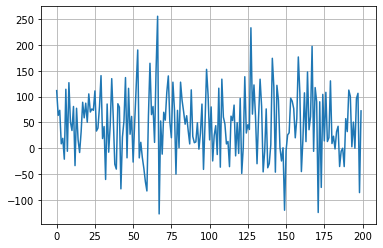

In [ ]:
plt.plot(y)
plt.grid()

Представим, что наблюдения входов и выходов объекта нам поступают последовательно, и мы хотим не ждать какое-то время и копить измерения, а хотим получать оценку параметров объекта  $ \large \vec{\hat{c}_{LS}} $  сразу, используя в качестве старта свое начальное приближение $\large \vec{\hat{c}}(0)$.

Для получения оценок таким образом подходит **рекуррентный МНК**. 
При идентификация параметров линейного регрессионного объекта соотношения для рекуррентного МНК выглядят следующим образом:
$$ \large \vec{\hat{c}_{LS}}(i+1) = \vec{\hat{c}_{LS}}(i) + K(i+1)(y(i)-\vec{u}^{T}(i)\vec{\hat{c}_{LS}}(i)) $$
$$ $$
$$ \large K(i+1) = P(i)\vec{u}(i)\frac{1}{\frac{1}{r(i)}+\vec{u}^{T}(i)P(i)\vec{u}(i)} $$
$$ $$
$$ \large P(i+1) = P(i) - \frac{1}{\frac{1}{r(i)}+\vec{u}^{T}(i)P(i)\vec{u}(i)}P(i)\vec{u}(i)\vec{u}^{T}(i)P(i) $$

Для запуска рекуррентного процесса необходимо задать начальные приближения $\large \vec{\hat{c}}_{LS}(0)$ и $\large P(0)$. Задать их можно разными способами, но будем пользоваться следующим подходом:
> чем хуже начальные приближения $\vec{\hat{c}_{LS}}(0)$, тем больше должна быть матрица $P(0)$. Матрицу $P(0)$ будем задавать в виде: $P(0)= \lambda I $, где $\lambda$ — некоторое число, выбираемое в соответствии с тем, насколько плохи начальные приближения, $I$ - единичная матрица.

### Оценивание параметров объекта с помощью рекуррентного МНК 
1. Создайте __class RecurrentMLS__ с методами: <br>

    * в конструкторе класса небходимо задать:<br>
     ` λ ` - параметр в формуле задания начального приближения матрицы P(0) = λ*I <br><br>

    * __def fit(U, y, c0)__ - метод реализует алгоритм итерационного оценивания параметов объекта с использованием квадратичной функции потерь (см. описание выше):<br>
         ```
        Input:
            U - матрица входов объекта, [X] = m x N
            y - вектор выходов объекта, [y] = N
            с0 - вектор начального приближения, [c0] = m+1
         ```      
    * __def get_coefs()__ - метод возвращает массив коэффициентов оценок вектора параметров объекта, получаемого на каждом новом шаге измерений:
        ```
        Output:
            c_estim_recMLS - массив оценок параметров объекта, полученный в результате работы метода fit.                   ```
2. Реализуйте функцию __smooth_errors(c_estim, c_true)__  , вычисляющую сглаженную ошибку оценки по 10 измерениям:
$$err(i) = \sqrt{\frac{1}{10}\sum_{k=0}^{9}\sum_{j=0}^{m} (\hat{c_j}(i-k)-c_j))^2}$$, где i - номер итерации/измерения, k - номер итерации/измерения, j - порядковый номер параметра объекта.
         Input: 
             c_estim - массив оценок параметров объекта, [c_estim] = m+1 x N
             c_true - вектор истинных параметров объекта, [c_true] = m+1 
         Output:
             err - массив сглаженных ошибок оценки
3. Проведите анализ работы (скорость сходимости, точность оценки, см. SMOI_LR_2_description.pdf) алгоритма рекуррентного МНК для получения оценок параметров в зависимости от разничных начальных приближений значений параметров объекта и выбора гиперпараметра λ. Постройте графики сходимости ошибки оценки в зависимотси от номера итерации, оформите отчет по лабораторной работе.

In [ ]:
class RecurrentMLS:
 
    def __init__(self, lam):
        self.lam = lam
        self.c_estim_recMLS = np.array([])

    def fit(self, U, y, c0):
      self.c_estim_recMLS = np.zeros((len(y)+1,len(c0)))
      c_prev = c0.reshape(len(c0),1)
      self.c_estim_recMLS[0]=c0
      P_prev = self.lam*np.eye(len(U[0]))
      
      for i in range(len(y)):
        u_i = U[i].reshape(len(U[i]),1)
        K = np.matmul( P_prev, u_i )
        inv = np.matmul( np.transpose(u_i), P_prev )
        inv = np.matmul(inv,u_i)
        inv +=1
        inv = 1/inv
        K *= inv

        residual = y[i] - np.matmul(np.transpose(u_i),c_prev)
        c_curr = c_prev + np.matmul(K, residual)
        self.c_estim_recMLS[i+1]=c_curr.reshape(len(c_curr))

        P_curr = P_prev - np.matmul(K,np.transpose(u_i))*P_prev

        P_prev = P_curr
        c_prev = c_curr

    def get_coefs(self):
      return self.c_estim_recMLS

    def smooth_errors(self, c_true):
      err = np.zeros(N-9)
      for i in range(9,N):
        for k in range(10):
          curr_err=0
          for j in range(len(c)):
            curr_err+=(self.c_estim_recMLS[10*i+k][j]-c_true[j])**2
          err[i]+=curr_err/5
        err[i]/=10
        err[i]=np.sqrt(err[i])
      return err

## Результаты

In [ ]:
experiment = np.zeros((
    3, # type of start values
    4, # lammda value
    int(N*0.1), # iterations
))

fit_res = np.zeros((
    3, # type of start values
    4, # lammda value
    len(c) #number of parameters
))

### Начальные условия

In [ ]:
c_st = np.array([
               [0,0,0,0,0],
               [-1,5,-7,2,9],
               [1.7, 4., 6.8, 3.019, 4.993]
])

lam = np.array([0.1,1,10,100])

### Параметры

In [ ]:
for nu_i in range(3):
  for lam_i in range(len(lam)):
    exp = RecurrentMLS(lam[lam_i])
    exp.fit(U,y,c_st[nu_i])
    # print(exp.lam,exp.get_coefs())
    fit_res[nu_i,lam_i] = exp.get_coefs()[N]
    
    experiment[nu_i,lam_i,:]=exp.smooth_errors(c)

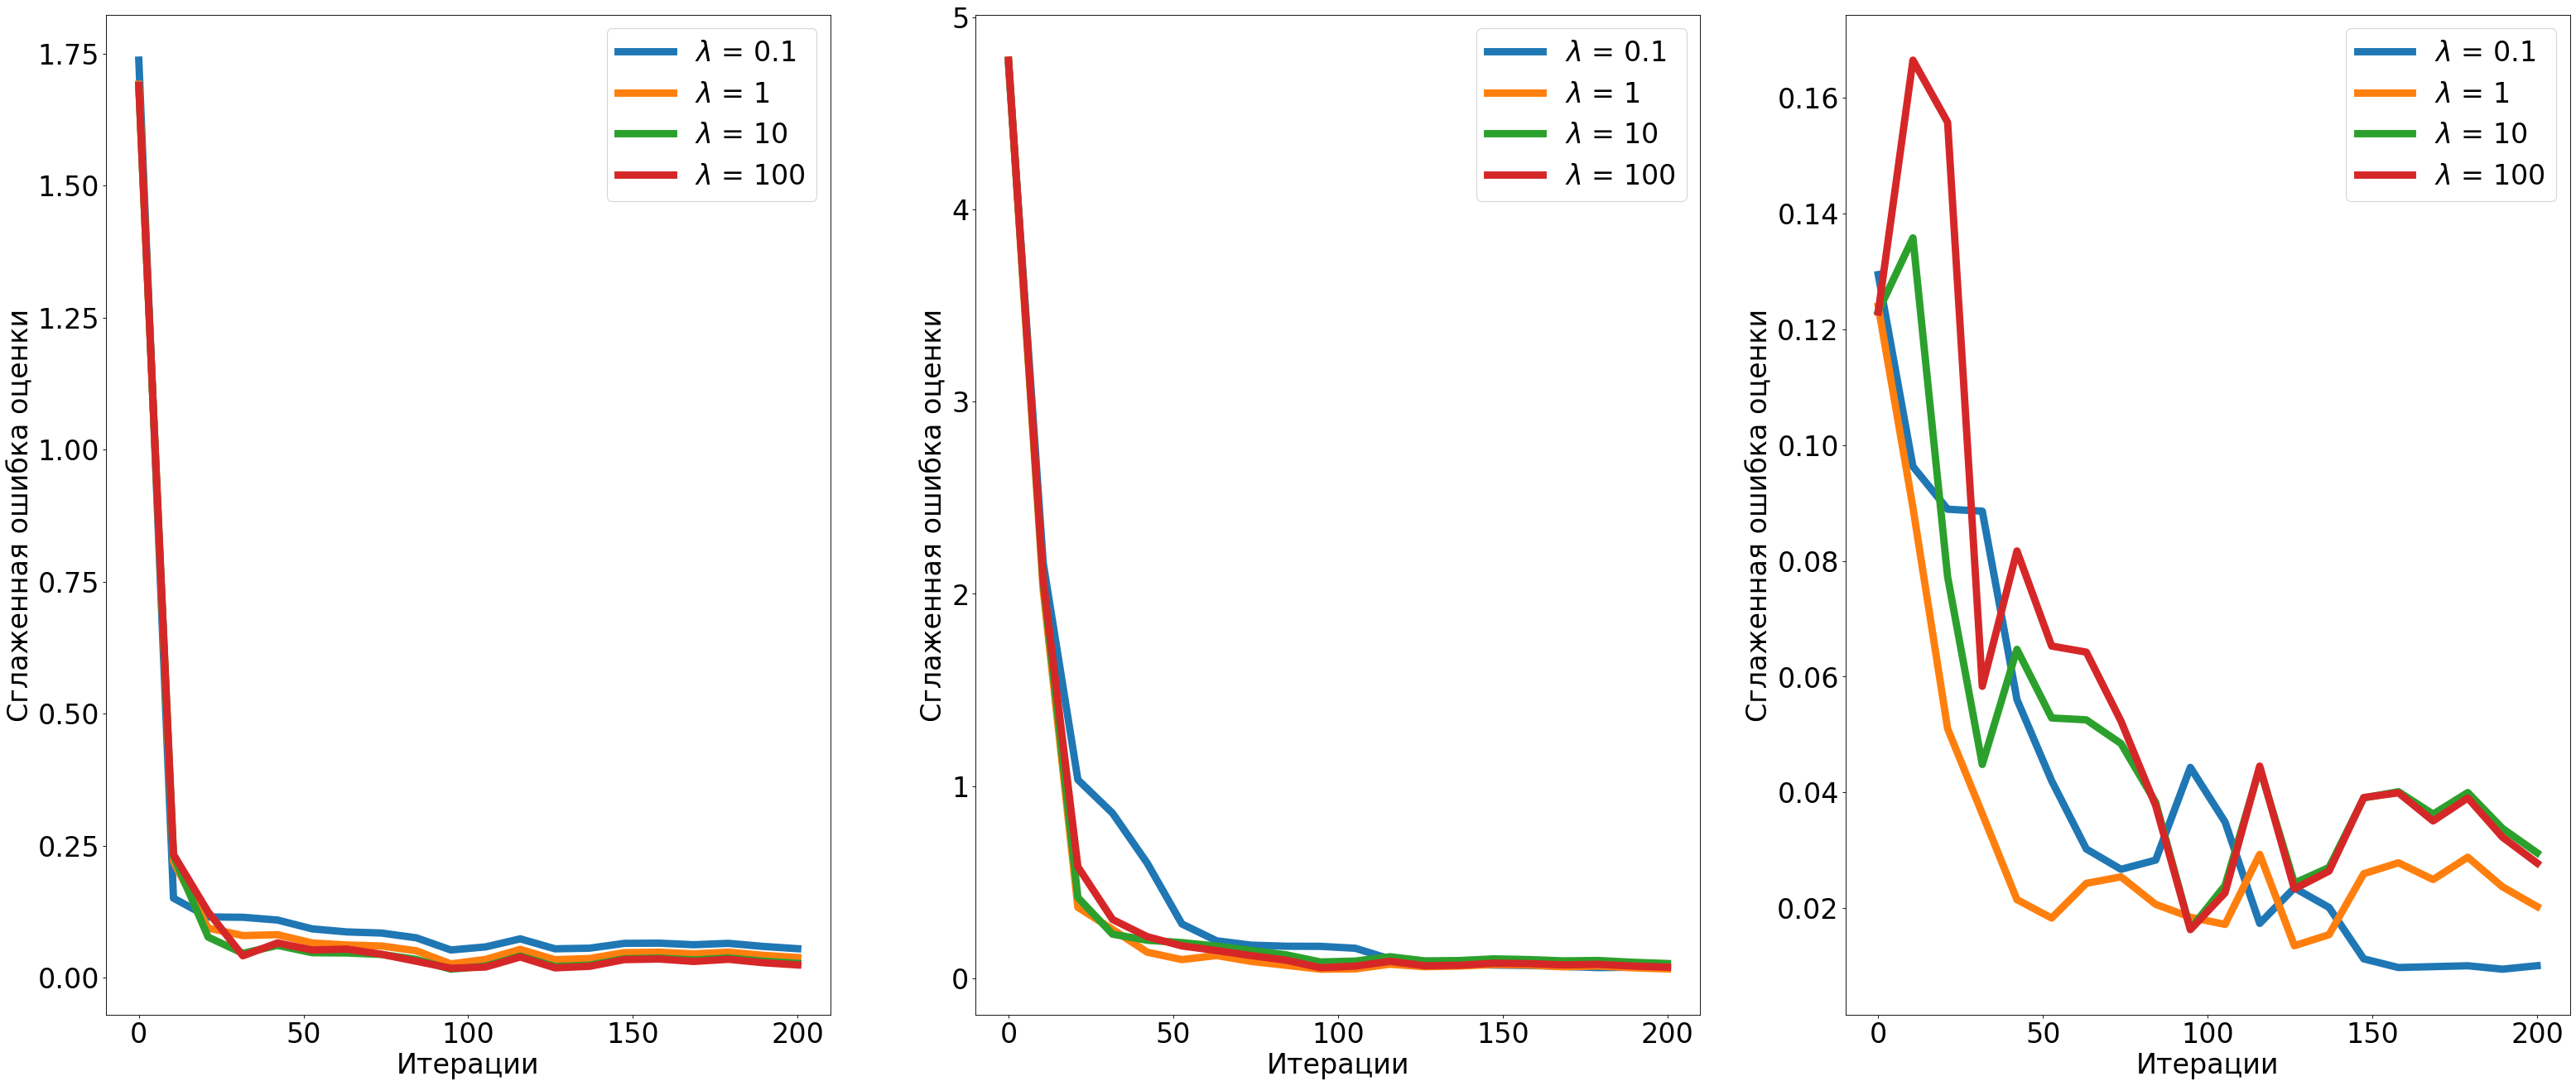

In [ ]:
matplotlib.rcParams.update({'font.size': 30})
fig, axs = plt.subplots(nrows=1, ncols=3)
labels = [r'$\lambda$ = 0.1',r'$\lambda$ = 1',r'$\lambda$ = 10',r'$\lambda$ = 100']
x = np.linspace(0,N,int(N/10))
ax = axs[0]
ax.set_xlabel('Итерации')
ax.set_ylabel('Сглаженная ошибка оценки')
for i in range(len(lam)):
  ax.plot(x,experiment[0,i,:], label=labels[i], linewidth=8)
ax.legend(prop={"size":30})

ax = axs[1]
ax.set_xlabel('Итерации')
ax.set_ylabel('Сглаженная ошибка оценки')
for i in range(len(lam)):
  ax.plot(x,experiment[1,i,:], label=labels[i], linewidth=8)
ax.legend(prop={"size":30})

ax = axs[2]
ax.set_xlabel('Итерации')
ax.set_ylabel('Сглаженная ошибка оценки')
for i in range(len(lam)):
  ax.plot(x,experiment[2,i,:], label=labels[i], linewidth=8)
ax.legend(prop={"size":30})

fig.set_figwidth(48)
fig.set_figheight(20)
fig.set_dpi(80)
plt.show()

In [ ]:
columns = ['err_c0','err_c1','err_c2','err_c3','err_c4']
indecies = ['st1,lam1','st1,lam2','st1,lam3','st1,lam4','st2,lam1','st2,lam2','st2,lam3','st2,lam4','st3,lam1','st3,lam2','st3,lam3','st3,lam4']
# fit_res[nu_i,lam_i] = exp.get_coefs()[N]
data = abs(fit_res[:,:]-c)

err = np.zeros(3*len(lam))
for i in range(3):
  for j in range(len(lam)):
    for k in range(len(c)):
      err[i*len(lam)+j] += data[i,j,k]**2
    err[i*3+j] /= len(c)

In [ ]:
import pandas as pd
df = pd.DataFrame (data=data.reshape(12,5),columns=columns,index=indecies)
df['LS'] = err
df

err_c0    err_c1    err_c2    err_c3    err_c4        LS
st1,lam1  0.111425  0.001200  0.012228  0.009867  0.001837  0.002533
st1,lam2  0.072791  0.003339  0.012989  0.007605  0.005745  0.001114
st1,lam3  0.047201  0.005725  0.014075  0.005989  0.007236  0.000509
st1,lam4  0.039260  0.008640  0.013514  0.005281  0.006885  0.000075
st2,lam1  0.076835  0.093107  0.038841  0.035320  0.039519  0.003778
st2,lam2  0.092201  0.033393  0.002458  0.002322  0.016103  0.001977
st2,lam3  0.158403  0.007447  0.002376  0.012836  0.000895  0.001013
st2,lam4  0.115876  0.007487  0.006553  0.010702  0.002798  0.002730
st3,lam1  0.016606  0.009040  0.017896  0.001375  0.007656  0.000148
st3,lam2  0.031248  0.006289  0.015120  0.005115  0.007535  0.000266
st3,lam3  0.052713  0.006238  0.013309  0.006450  0.006720  0.003082
st3,lam4  0.048039  0.008555  0.012703  0.005914  0.006395  0.002618

In [ ]:
# save to xlsx
filepath = 'report_table.xlsx'
df.to_excel(filepath, index=False)